# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os 
import scipy.stats as st

from datetime import date
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as its being processed (with the city number and city name).


In [49]:
#set query url and unit measuremnt type
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set lists to hold df values
name = []
country = []
lat = []
lon = []
max_temp = []
hum = []
clouds = []
wind_speed = []
date = []

#set record and set count
record = 0
set_count = 1

#format print log
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for index, city in enumerate(cities, start = 1): 
    response = requests.get(query_url + city).json()
    #pprint(response)
    
    try:
        name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])       
        city_name = response["name"]
        
        if record > 49:
            record = 0
            set_count = set_count + 1
        else:
            record = record + 1
            
        print(f"Processing Record {record} of Set {set_count} | {city_name}")
        
        time.sleep(1)
        
    except:
        print(f"City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Westport
Processing Record 2 of Set 1 | Albany
Processing Record 3 of Set 1 | Narsaq
Processing Record 4 of Set 1 | Baykal'sk
Processing Record 5 of Set 1 | Leningradskiy
Processing Record 6 of Set 1 | Provideniya
Processing Record 7 of Set 1 | Redlands
Processing Record 8 of Set 1 | Port-Gentil
Processing Record 9 of Set 1 | Sørland
Processing Record 10 of Set 1 | Tuktoyaktuk
Processing Record 11 of Set 1 | Upernavik
Processing Record 12 of Set 1 | Kavaratti
Processing Record 13 of Set 1 | Mar del Plata
Processing Record 14 of Set 1 | Jamestown
City not found. Skipping...
Processing Record 15 of Set 1 | Punta Arenas
Processing Record 16 of Set 1 | Cabo San Lucas
Processing Record 17 of Set 1 | City of San Pedro
Processing Record 18 of Set 1 | Coyhaique
Processing Record 19 of Set 1 | Omboué
Processing Record 20 of Set 1 | Nuuk
Processing Record 21 of Set 1 | Twentynine Palms
Processing Record 22 of

Processing Record 36 of Set 4 | Vila Velha
Processing Record 37 of Set 4 | Portel
Processing Record 38 of Set 4 | Sitka
Processing Record 39 of Set 4 | Newton
Processing Record 40 of Set 4 | Venice of the Philippines
Processing Record 41 of Set 4 | Carballo
Processing Record 42 of Set 4 | Jurm
Processing Record 43 of Set 4 | São João da Barra
Processing Record 44 of Set 4 | Fare
Processing Record 45 of Set 4 | Osterburg
Processing Record 46 of Set 4 | Uyuni
Processing Record 47 of Set 4 | Dudinka
Processing Record 48 of Set 4 | Kaitangata
Processing Record 49 of Set 4 | Esperance
Processing Record 50 of Set 4 | Tailai
Processing Record 0 of Set 5 | Gao
Processing Record 1 of Set 5 | Afuá
City not found. Skipping...
Processing Record 2 of Set 5 | Necochea
Processing Record 3 of Set 5 | Brunswick
Processing Record 4 of Set 5 | Ridgecrest
Processing Record 5 of Set 5 | Usinsk
City not found. Skipping...
Processing Record 6 of Set 5 | Khor
Processing Record 7 of Set 5 | Gangānagar
Processi

Processing Record 19 of Set 8 | Arman'
Processing Record 20 of Set 8 | Kruisfontein
Processing Record 21 of Set 8 | Batouri
Processing Record 22 of Set 8 | Tombouctou
Processing Record 23 of Set 8 | Antofagasta
Processing Record 24 of Set 8 | Miyako
Processing Record 25 of Set 8 | Auki
Processing Record 26 of Set 8 | Bilibino
Processing Record 27 of Set 8 | Butembo
Processing Record 28 of Set 8 | Sarkand
Processing Record 29 of Set 8 | Vila
Processing Record 30 of Set 8 | Banda Aceh
Processing Record 31 of Set 8 | Province of Trapani
Processing Record 32 of Set 8 | Kalamnūri
Processing Record 33 of Set 8 | San Giovanni Rotondo
Processing Record 34 of Set 8 | Rawson
Processing Record 35 of Set 8 | Khovd
Processing Record 36 of Set 8 | Lázaro Cárdenas
Processing Record 37 of Set 8 | Healdsburg
Processing Record 38 of Set 8 | Kalispell
Processing Record 39 of Set 8 | Poniatowa
Processing Record 40 of Set 8 | Krumovgrad
Processing Record 41 of Set 8 | Vanimo
Processing Record 42 of Set 8 |

Processing Record 0 of Set 12 | Shaunavon
Processing Record 1 of Set 12 | Miranda de Ebro
City not found. Skipping...
Processing Record 2 of Set 12 | Mercedes
Processing Record 3 of Set 12 | Ketchikan
Processing Record 4 of Set 12 | Kholodnyy
Processing Record 5 of Set 12 | Inuvik
Processing Record 6 of Set 12 | Taylor
Processing Record 7 of Set 12 | Mahanoro
Processing Record 8 of Set 12 | Raahe
Processing Record 9 of Set 12 | Karratha
Processing Record 10 of Set 12 | Venezuela
Processing Record 11 of Set 12 | Cortez
Processing Record 12 of Set 12 | Kiryat Gat
Processing Record 13 of Set 12 | Ambovombe
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [50]:
#create df of city weather 
city_weather = pd.DataFrame({"City": name,
                             "Lat": lat,
                             "Lng": lon,
                             "Max Temp": max_temp,
                             "Humidity": hum,
                             "Cloudiness": clouds,
                             "Wind Speed": wind_speed,
                             "Country": country,
                             "Date": date})

#set output file and write df to a csv
output_file = os.path.join("..", "Output_Data", "cities.csv")

city_weather.to_csv(output_file, index=False, header=True)
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Westport,41.1415,-73.3579,35.01,100,82,7.02,US,1609910785
1,Albany,42.6001,-73.9662,30.00,85,88,4.81,US,1609910787
2,Narsaq,60.9167,-46.0500,21.20,44,28,5.82,GL,1609910788
3,Baykal'sk,51.5058,104.1469,3.07,88,100,11.45,RU,1609910789
4,Leningradskiy,69.3833,178.4167,-9.85,88,100,9.22,RU,1609910790


In [51]:
#calculate descriptive statistics 
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,21.263483,12.728707,48.106115,76.207317,56.456446,8.048711,1.609911e+09
std,33.490432,90.557253,32.256703,18.297728,38.592524,5.724449,2.183702e+02
min,-54.800000,-179.166700,-42.860000,1.000000,0.000000,0.130000,1.609911e+09
25%,-7.775200,-67.496475,30.000000,68.000000,19.000000,3.902500,1.609911e+09
50%,27.946800,16.215800,55.400000,80.500000,75.000000,6.690000,1.609911e+09
75%,50.100075,88.327075,74.710000,88.000000,90.750000,11.300000,1.609911e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,39.060000,1.609912e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
humidity_check = city_weather.loc[city_weather["Humidity"] > 100]
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [53]:
#  Get the indices of cities that have humidity over 100%.


In [54]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

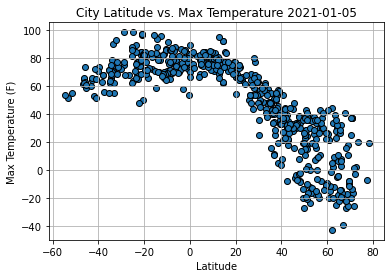

In [57]:
#set variable for current date to print 
today = date.today()

#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Max Temp"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {today}")

#save figure as png  
plt.savefig("Fig1.png", format='png')

plt.show()

This plot shows the correlation between the max temperature of cities around the world and their latitudinal location.  With 0 on the x-axis being the equator, this plot shows that the maximum temperture at locations around the equator are the warmest, and that there is a moderate negative correlation between latitude and temperature. 

## Latitude vs. Humidity Plot

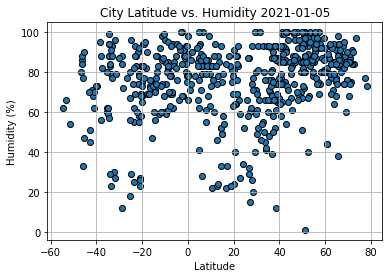

In [58]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Humidity"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {today}")

#save figure as png  
plt.savefig("Fig2.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of the city and their humidity level for the current day. Generally, it appears to show no real correlation between location and humidity levels.  

## Latitude vs. Cloudiness Plot

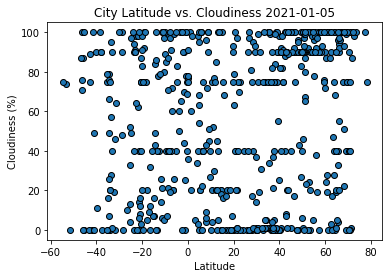

In [59]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Cloudiness"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {today}")

#save figure as png  
plt.savefig("Fig3.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and the cloudiness level for the current day.  Generally, it appears to show no real correlation beteen latitude and cloudiness levels. 

## Latitude vs. Wind Speed Plot

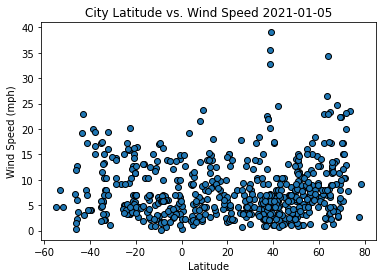

In [60]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Wind Speed"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {today}")

#save figure as png  
plt.savefig("Fig4.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and their current wind speed.  Generally, there appears to be no real correlation between location and wind speed. 

## Linear Regression

In [61]:
north = city_weather.loc[city_weather["Lat"] >= 0]
south = city_weather.loc[city_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8479376855369448


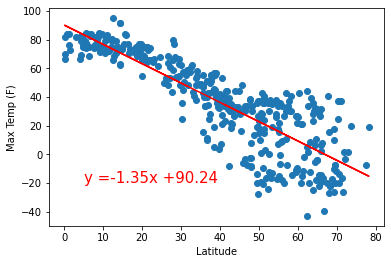

In [62]:
x = north["Lat"]
y = north["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(5, -20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4288073024601654


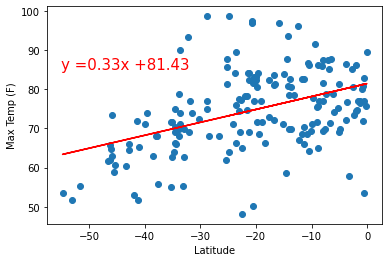

In [63]:
x = south["Lat"]
y = south["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 85), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27446938752008354


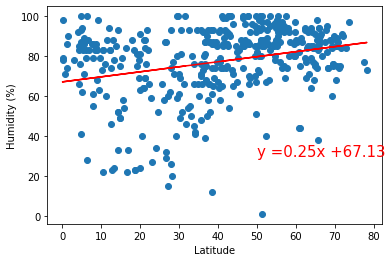

In [64]:
x = north["Lat"]
y = north["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(50, 30), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24211091861349027


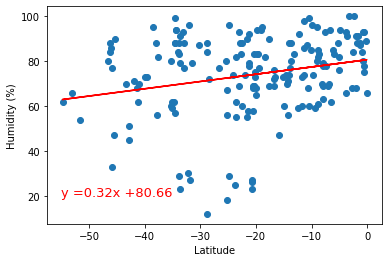

In [65]:
x = south["Lat"]
y = south["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2503271961190684


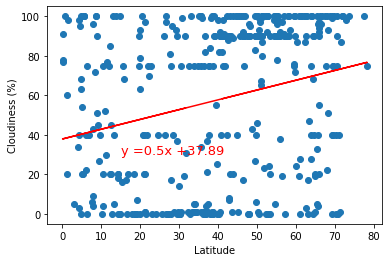

In [66]:
x = north["Lat"]
y = north["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(15, 30), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08601772919052555


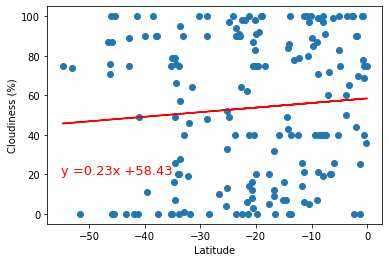

In [67]:
x = south["Lat"]
y = south["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17207964494905245


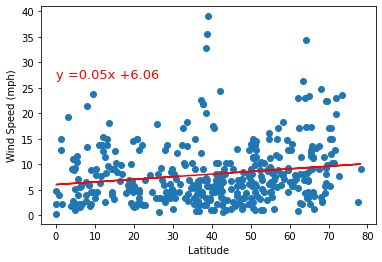

In [68]:
x = north["Lat"]
y = north["Wind Speed"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(0, 27), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1699031906478029


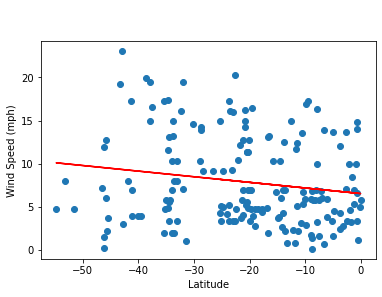

In [69]:
x = south["Lat"]
y = south["Wind Speed"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 27), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()